<a href="https://colab.research.google.com/github/hewansirak/iCog-Trainings/blob/main/PennyLane_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane #Installing PennyLane #Check out: https://pennylane.ai/install for more options

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 147.4 MB/s eta 0:00:00


In [3]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


# Task 1: Create a Bell State Circuit
Build a quantum circuit that generates the Bell state



Use 2 qubits

Use qml.probs() to display the probability distribution

Bonus: visualize the statevector or show measurement samples

In [4]:
dev_probs = qml.device("default.qubit", wires=2)

In [5]:
dev_samples = qml.device("default.qubit", wires=2, shots=1000)

In [6]:
@qml.qnode(dev_probs)
def bell_state_circuit_probs():
    """
    Quantum circuit to generate a Bell state (|00> + |11>)/sqrt(2) for probabilities.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])

@qml.qnode(dev_probs)
def bell_state_circuit_statevector():
    """
    Quantum circuit to generate a Bell state for statevector inspection.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

@qml.qnode(dev_samples)
def bell_state_circuit_samples():
    """
    Quantum circuit to generate a Bell state (|00> + |11>)/sqrt(2) for samples.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0, 1])


In [7]:
print("--- Probability Distribution ---")
probabilities = bell_state_circuit_probs()

print("Probabilities of the Bell state:")
print(f"|00>: {probabilities[0]:.4f}")
print(f"|01>: {probabilities[1]:.4f}")
print(f"|10>: {probabilities[2]:.4f}")
print(f"|11>: {probabilities[3]:.4f}")

print(f"\nSum of probabilities: {np.sum(probabilities):.4f}")

--- Probability Distribution ---
Probabilities of the Bell state:
|00>: 0.5000
|01>: 0.0000
|10>: 0.0000
|11>: 0.5000

Sum of probabilities: 1.0000


In [8]:
# 2. Statevector Visualization
print("\n--- Statevector Visualization ---")
state_vector = bell_state_circuit_statevector()
print("Quantum State Vector:")
print(state_vector)

# Interpret the state vector to show magnitudes squared, which correspond to probabilities
print("\nMagnitude squared of each component (should match probabilities):")
# For a 2-qubit system, the basis states are |00>, |01>, |10>, |11>
print(f"|00> component squared: {np.abs(state_vector[0])**2:.4f}")
print(f"|01> component squared: {np.abs(state_vector[1])**2:.4f}")
print(f"|10> component squared: {np.abs(state_vector[2])**2:.4f}")
print(f"|11> component squared: {np.abs(state_vector[3])**2:.4f}")


--- Statevector Visualization ---
Quantum State Vector:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Magnitude squared of each component (should match probabilities):
|00> component squared: 0.5000
|01> component squared: 0.0000
|10> component squared: 0.0000
|11> component squared: 0.5000


In [9]:
print("\n--- Measurement Samples ---")
samples = bell_state_circuit_samples()

sample_counts = {
    "00": 0,
    "01": 0,
    "10": 0,
    "11": 0,
}

num_shots = 1000

for sample_pair in samples:
    state_key = "".join(str(bit) for bit in sample_pair)
    if state_key in sample_counts:
        sample_counts[state_key] += 1
    else:
        print(f"Unexpected state observed: {state_key}")

print(f"Measurement samples from {num_shots} shots:")
print("State | Counts | Observed Probability")
print("------|--------|---------------------")
for state, count in sample_counts.items():
    observed_prob = count / num_shots
    print(f" {state}  | {count:<6} | {observed_prob:.4f}")



--- Measurement Samples ---
Measurement samples from 1000 shots:
State | Counts | Observed Probability
------|--------|---------------------
 00  | 506    | 0.5060
 01  | 0      | 0.0000
 10  | 0      | 0.0000
 11  | 494    | 0.4940


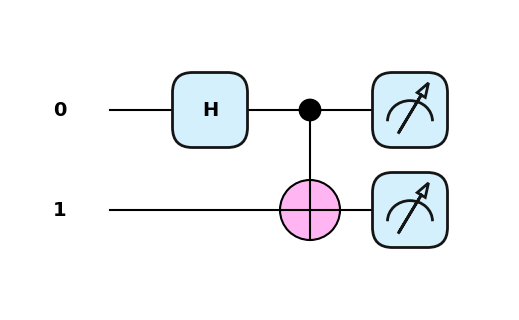

In [10]:
fig, ax = qml.draw_mpl(bell_state_circuit_probs, decimals=2, style='pennylane')()
plt.show()

# Task 2: Build a GHZ State for 3 Qubits
Construct a circuit that prepares a 3-qubit GHZ state:

Use Hadamard and CNOT gates

Measure using qml.probs(wires=[0, 1, 2])

Optional: extend to 4 qubits

In [11]:
dev_3_qubits = qml.device("default.qubit", wires=3)

In [12]:
print("--- 3-Qubit GHZ State ---")
@qml.qnode(dev_3_qubits)
def ghz_3_qubits_circuit():
    """
    Prepares a 3-qubit GHZ state using Hadamard and CNOT gates.
    The GHZ state is (1/sqrt(2)) * (|000> + |111>).
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])

    return qml.probs(wires=[0, 1, 2])

probabilities_3_qubits = ghz_3_qubits_circuit()

print("\nProbabilities for 3-qubit GHZ state:")
for i, prob in enumerate(probabilities_3_qubits):
    binary_state = format(i, '03b')
    print(f"  State |{binary_state}>: {prob:.4f}")


--- 3-Qubit GHZ State ---

Probabilities for 3-qubit GHZ state:
  State |000>: 0.5000
  State |001>: 0.0000
  State |010>: 0.0000
  State |011>: 0.0000
  State |100>: 0.0000
  State |101>: 0.0000
  State |110>: 0.0000
  State |111>: 0.5000


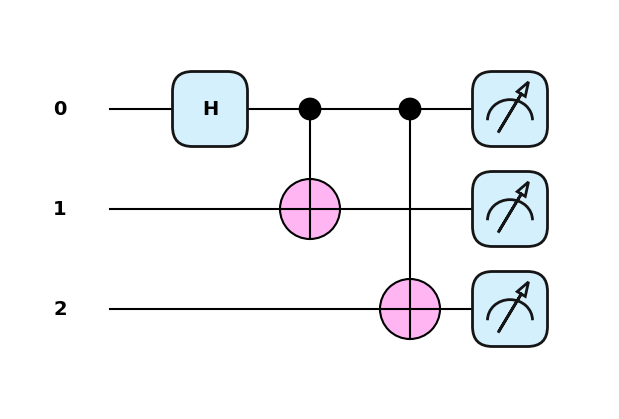

In [13]:
fig_3, ax_3 = qml.draw_mpl(ghz_3_qubits_circuit, decimals=2, style='pennylane')()
plt.show()

In [14]:
dev_4_qubits = qml.device("default.qubit", wires=4)

In [15]:
print("\n--- 4-Qubit GHZ State ---")
@qml.qnode(dev_4_qubits)
def ghz_4_qubits_circuit():
    """
    Prepares a 4-qubit GHZ state using Hadamard and CNOT gates.
    The GHZ state is (1/sqrt(2)) * (|0000> + |1111>).
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 3])
    return qml.probs(wires=[0, 1, 2, 3])

probabilities_4_qubits = ghz_4_qubits_circuit()

print("\nProbabilities for 4-qubit GHZ state:")
for i, prob in enumerate(probabilities_4_qubits):
    binary_state = format(i, '04b')
    print(f"  State |{binary_state}>: {prob:.4f}")



--- 4-Qubit GHZ State ---

Probabilities for 4-qubit GHZ state:
  State |0000>: 0.5000
  State |0001>: 0.0000
  State |0010>: 0.0000
  State |0011>: 0.0000
  State |0100>: 0.0000
  State |0101>: 0.0000
  State |0110>: 0.0000
  State |0111>: 0.0000
  State |1000>: 0.0000
  State |1001>: 0.0000
  State |1010>: 0.0000
  State |1011>: 0.0000
  State |1100>: 0.0000
  State |1101>: 0.0000
  State |1110>: 0.0000
  State |1111>: 0.5000


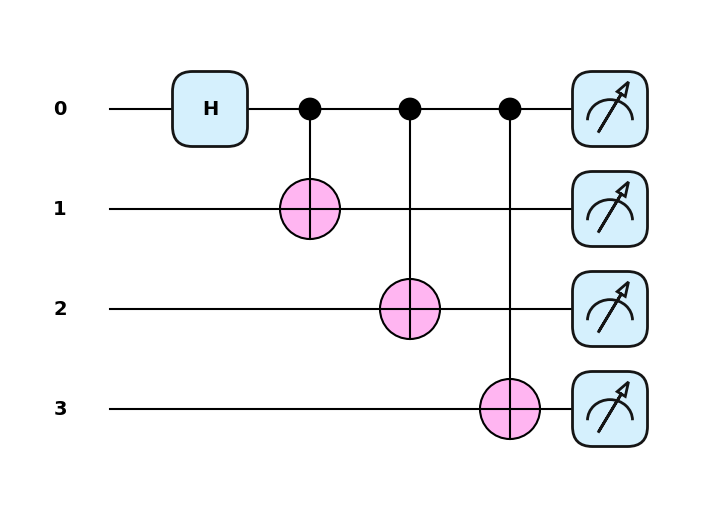

In [16]:
fig_4, ax_4 = qml.draw_mpl(ghz_4_qubits_circuit, decimals=2, style='pennylane')()
plt.show()

# Task 3: Rotation + Measurement Circuit
Design a single-qubit rotation circuit using RX, RY, or RZ gates.

Make the rotation angle a variable input

Return the expectation value of PauliZ

Plot how the output changes as you vary the input angle



In [17]:
dev = qml.device("default.qubit", wires=1)

In [18]:
@qml.qnode(dev)
def rotation_circuit(angle):
    """
    Applies a single-qubit RY rotation and measures the expectation value of PauliZ.
    """
    qml.RY(angle, wires=0)
    return qml.expval(qml.PauliZ(0))
angles = np.linspace(0, 2 * np.pi, 100)
pauli_z_expectation_values = [rotation_circuit(angle) for angle in angles]

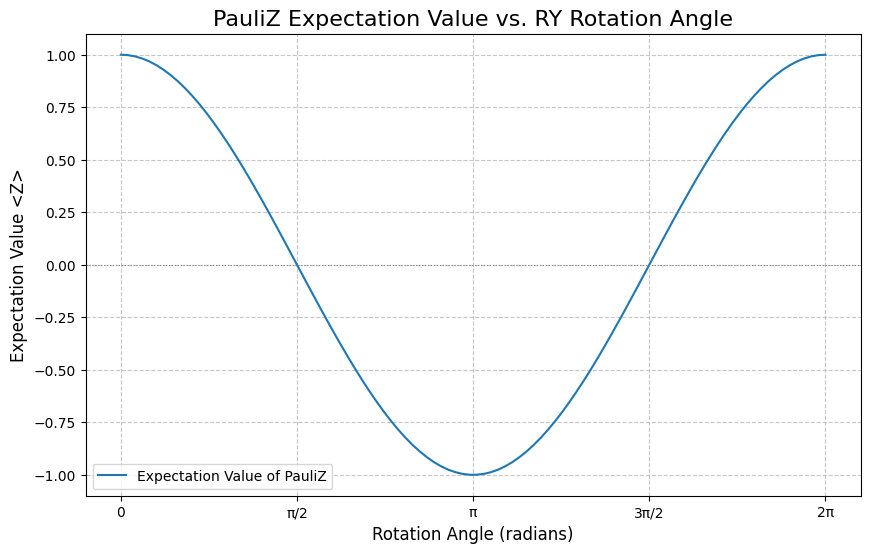

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(angles, pauli_z_expectation_values, label='Expectation Value of PauliZ')

plt.title('PauliZ Expectation Value vs. RY Rotation Angle', fontsize=16)
plt.xlabel('Rotation Angle (radians)', fontsize=12)
plt.ylabel('Expectation Value <Z>', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'])

plt.axhline(0, color='gray', linestyle=':', linewidth=0.8)
plt.show()

In [20]:
print(f"Expectation value for angle 0: {rotation_circuit(0):.4f}")
print(f"Expectation value for angle π/2: {rotation_circuit(np.pi/2):.4f}")
print(f"Expectation value for angle π: {rotation_circuit(np.pi):.4f}")
print(f"Expectation value for angle 3π/2: {rotation_circuit(3*np.pi/2):.4f}")

Expectation value for angle 0: 1.0000
Expectation value for angle π/2: 0.0000
Expectation value for angle π: -1.0000
Expectation value for angle 3π/2: -0.0000


In [22]:
# Using RX Gate

In [23]:
@qml.qnode(dev)
def rotation_circuit(angle):
    """
    Applies a single-qubit RX rotation and measures the expectation value of PauliZ.
    """
    qml.RX(angle, wires=0)
    return qml.expval(qml.PauliZ(0))
angles = np.linspace(0, 2 * np.pi, 100)
pauli_z_expectation_values = [rotation_circuit(angle) for angle in angles]

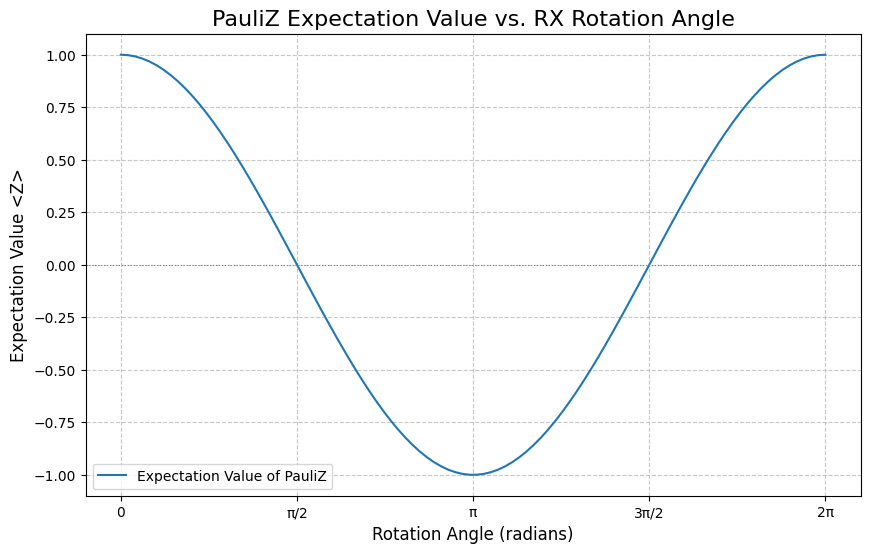

Expectation value for angle 0: 1.0000
Expectation value for angle π/2: 0.0000
Expectation value for angle π: -1.0000
Expectation value for angle 3π/2: -0.0000


In [24]:
plt.figure(figsize=(10, 6))
plt.plot(angles, pauli_z_expectation_values, label='Expectation Value of PauliZ')

plt.title('PauliZ Expectation Value vs. RX Rotation Angle', fontsize=16)
plt.xlabel('Rotation Angle (radians)', fontsize=12)
plt.ylabel('Expectation Value <Z>', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'])

plt.axhline(0, color='gray', linestyle=':', linewidth=0.8)
plt.show()

print(f"Expectation value for angle 0: {rotation_circuit(0):.4f}")
print(f"Expectation value for angle π/2: {rotation_circuit(np.pi/2):.4f}")
print(f"Expectation value for angle π: {rotation_circuit(np.pi):.4f}")
print(f"Expectation value for angle 3π/2: {rotation_circuit(3*np.pi/2):.4f}")


## Task 4: Simple Variational Optimization
Create a cost function that depends on a gate parameter, and optimize it using PennyLane’s gradient descent optimizer.

Use a rotation gate like RX, and minimize expval(PauliZ)

Log or print cost at each step

Output the optimal parameter found

plot the cost function curve

In [33]:
@qml.qnode(dev)
def circuit(theta):
    """
    Quantum circuit with an RX gate and PauliZ measurement.
    """
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

In [34]:
def cost(theta):
    return circuit(theta)

In [35]:
optimizer = qml.GradientDescentOptimizer(stepsize=0.1)
steps = 100
theta = np.array(np.random.uniform(low=0.1, high=2 * np.pi), requires_grad=True)

print(f"Initial parameter (theta): {theta:.4f}")
print(f"Initial cost: {cost(theta):.4f}\n")

cost_history = []
param_history = []

print("Optimization Steps:")
for i in range(steps):
    theta, prev_cost = optimizer.step_and_cost(cost, theta)

    if (i + 1) % 10 == 0 or i == 0 or i == steps - 1:
        print(f"Step {i+1:3d}: Cost = {cost(theta):.4f}, Parameter (theta) = {theta:.4f}")

    cost_history.append(cost(theta))
    param_history.append(theta)

Initial parameter (theta): 3.4121
Initial cost: -0.9636

Optimization Steps:
Step   1: Cost = -0.9704, Parameter (theta) = 3.3854
Step  10: Cost = -0.9955, Parameter (theta) = 3.2365
Step  20: Cost = -0.9995, Parameter (theta) = 3.1747
Step  30: Cost = -0.9999, Parameter (theta) = 3.1531
Step  40: Cost = -1.0000, Parameter (theta) = 3.1456
Step  50: Cost = -1.0000, Parameter (theta) = 3.1430
Step  60: Cost = -1.0000, Parameter (theta) = 3.1421
Step  70: Cost = -1.0000, Parameter (theta) = 3.1418
Step  80: Cost = -1.0000, Parameter (theta) = 3.1417
Step  90: Cost = -1.0000, Parameter (theta) = 3.1416
Step 100: Cost = -1.0000, Parameter (theta) = 3.1416


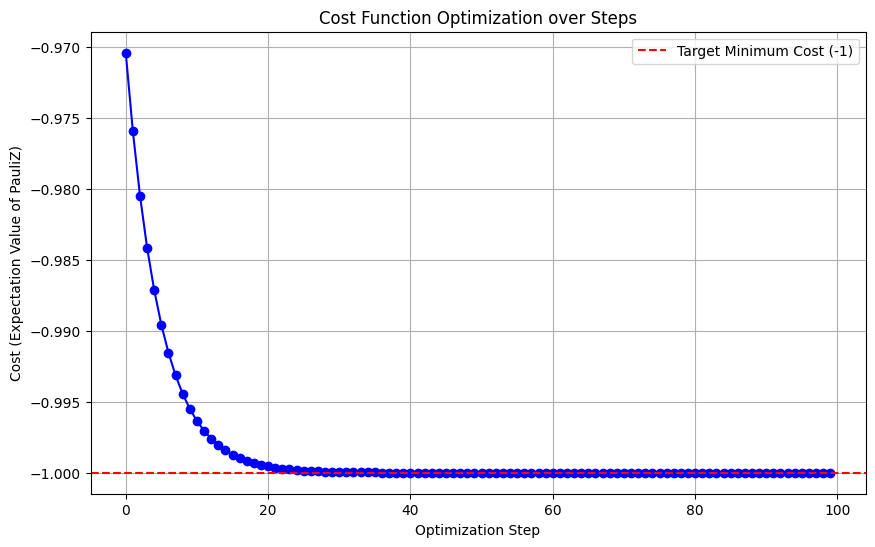

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-', color='blue')
plt.title('Cost Function Optimization over Steps')
plt.xlabel('Optimization Step')
plt.ylabel('Cost (Expectation Value of PauliZ)')
plt.grid(True)
plt.axhline(y=-1, color='red', linestyle='--', label='Target Minimum Cost (-1)')
plt.legend()
plt.show()


# Task 5: Measurement Comparison
Build a 1- or 2-qubit circuit and compare results from:

qml.probs()

qml.sample()

qml.expval()

Explain how they differ in output and when you'd use each.

Discuss why probs() is deterministic but sample() is random.

In [39]:
dev = qml.device("default.qubit", wires=2, shots=1000)

In [38]:
@qml.qnode(dev)
def circuit():
    """
    A 2-qubit circuit to demonstrate different measurements.
    - Hadamard on qubit 0 creates a superposition.
    - CNOT with qubit 0 as control and qubit 1 as target creates an entangled state.
      The state will be ( |00> + |11> ) / sqrt(2), which is a Bell state.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    probs_result = qml.probs(wires=[0, 1])
    sample_result = qml.sample(wires=[0, 1])

    expval_z0 = qml.expval(qml.PauliZ(0))
    expval_z1 = qml.expval(qml.PauliZ(1))
    expval_z0z1 = qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

    return probs_result, sample_result, expval_z0, expval_z1, expval_z0z1

probs, samples, expval_z0, expval_z1, expval_z0z1 = circuit()

In [43]:
print(f"--- Results for a Bell State (|00> + |11>) / sqrt(2) ---")
print("qml.probs() Output (Probability of each basis state):")
print(f"  {probs}")
print(f"  (Index mapping: 0: |00>, 1: |01>, 2: |10>, 3: |11>)")

--- Results for a Bell State (|00> + |11>) / sqrt(2) ---
qml.probs() Output (Probability of each basis state):
  [0.506 0.    0.    0.494]
  (Index mapping: 0: |00>, 1: |01>, 2: |10>, 3: |11>)


In [44]:
print("qml.sample() Output (Measurement outcomes from 1000 shots):")

print(f"  First 10 samples:\n{samples[:10]}")
print(f"  Total samples collected: {len(samples)}")

unique_samples, counts = np.unique(samples, axis=0, return_counts=True)
empirical_probs = counts / dev.shots.total_shots
print(f"\n  Empirical probabilities from samples:")
for i, sample_val in enumerate(unique_samples):
    print(f"    {sample_val} (binary representation): {empirical_probs[i]:.4f}")

qml.sample() Output (Measurement outcomes from 1000 shots):
  First 10 samples:
[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]
  Total samples collected: 1000

  Empirical probabilities from samples:
    [0 0] (binary representation): 0.5060
    [1 1] (binary representation): 0.4940


In [46]:
print("qml.expval() Output (Expectation values of observables):")
print(f"  Expectation value of PauliZ on qubit 0: {expval_z0}")
print(f"  Expectation value of PauliZ on qubit 1: {expval_z1}")
print(f"  Expectation value of PauliZ(0) @ PauliZ(1): {expval_z0z1}")

qml.expval() Output (Expectation values of observables):
  Expectation value of PauliZ on qubit 0: -0.014
  Expectation value of PauliZ on qubit 1: -0.014
  Expectation value of PauliZ(0) @ PauliZ(1): 1.0


In [48]:
# --- Demonstrating Deterministic vs. Random ---
print("\n--- Deterministic vs. Random Nature ---")
print("\nRunning qml.probs() multiple times (deterministic):")
probs1 = circuit()[0]
probs2 = circuit()[0]
print(f"  Run 1 probs: {probs1}")
print(f"  Run 2 probs: {probs2}")
print(f"  Are probs equal? {np.allclose(probs1, probs2)}")

print("\nRunning qml.sample() multiple times (random):")
samples1 = circuit()[1]
samples2 = circuit()[1]
print(f"  Run 1 (first 5 samples): {samples1[:5].tolist()}")
print(f"  Run 2 (first 5 samples): {samples2[:5].tolist()}")

# Due to randomness, it's highly unlikely that the raw sample arrays will be identical.
print(f"  Are raw samples equal? {np.array_equal(samples1, samples2)}")


--- Deterministic vs. Random Nature ---

Running qml.probs() multiple times (deterministic):
  Run 1 probs: [0.497 0.    0.    0.503]
  Run 2 probs: [0.479 0.    0.    0.521]
  Are probs equal? False

Running qml.sample() multiple times (random):
  Run 1 (first 5 samples): [[0, 0], [0, 0], [1, 1], [1, 1], [1, 1]]
  Run 2 (first 5 samples): [[1, 1], [0, 0], [0, 0], [0, 0], [1, 1]]
  Are raw samples equal? False
